In [96]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

import warnings 
warnings.filterwarnings('ignore')


from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression ,Lasso ,Ridge
from sklearn.model_selection import RandomizedSearchCV
 
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


> ### Import Data using Csv into a pandas DataFrame

In [97]:
df = pd.read_csv('/Users/sly/Desktop/ML_projects/src/Notebook/data/StudentsPerformance.csv')

In [98]:
df.sample(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
947,female,group D,some college,free/reduced,none,49,58,60
687,male,group D,associate's degree,free/reduced,none,77,78,73
892,female,group A,master's degree,free/reduced,none,50,67,73
58,male,group D,some college,standard,completed,58,59,58
850,male,group C,master's degree,standard,none,71,67,67
995,female,group E,master's degree,standard,completed,88,99,95
852,female,group E,some college,standard,none,87,85,93
797,female,group E,associate's degree,free/reduced,none,70,84,81
437,male,group D,associate's degree,free/reduced,none,75,66,73
884,female,group E,associate's degree,standard,none,51,51,54


> ### Preparing X and Y Variables 

In [99]:
# renaming columns name with space into _ 
df = (df.copy()
 .rename(columns = lambda col_name : col_name.replace(' ' , '_'))
)


In [100]:
# x features 
x = df.copy()
# y target feature math_score 
y = x.pop('math_score')

In [101]:
# Creating columns Transfomer with 3 types of transformers 
numerical_features = x.select_dtypes(np.number).columns
categorical_feature = x.select_dtypes('object').columns

from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


numeric_transform = StandardScaler()
onehot_tranform = OneHotEncoder()

preprocesser = ColumnTransformer(
    [
        # categorical onehot encoding 
        ('OneHotEnoder' , onehot_tranform , categorical_feature) , 
        ('StanderScaler' , numeric_transform , numerical_features),

    ]
)

In [102]:
categorical_feature

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [103]:
x_trans = preprocesser.fit_transform(x)

In [104]:
# spreating the data into train and test sets
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_trans , y ,test_size=0.2 , random_state=42)

## Create an Evaluate Function to give all metrics after model training 


In [105]:
def evaluate_model(true , predicted):
    mae = mean_absolute_error(true , predicted)
    mse = mean_squared_error(true , predicted)
    r2_score_ = r2_score(true ,predicted)


    return mae , mse , r2_score_


## Prepering for model training 

In [106]:
models = {
    "LinearRegression" : LinearRegression() , 
    "Lasso" : Lasso() , 
    "Ridge" : Ridge() , 
    'RandomForestRegressor' : RandomForestRegressor() , 
    'AdaBoostRegressor' : AdaBoostRegressor() , 
    'DecisionTreeRegressor' : DecisionTreeRegressor() , 
    'XGBRegressor' : XGBRegressor() , 
    'CatBoostRegressor' : CatBoostRegressor(verbose=False)
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train , y_train)


    # Make predictions 
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate Train and Test Datasets 
    model_train_mae  , model_train_mse  , model_train_r2score = evaluate_model(y_train , y_train_pred )
    model_test_mae  , model_test_mse  , model_test_r2score  = evaluate_model(y_test , y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print(" - Model performance for Training set")
    print(" - Root Mean Squared Error {:.4f}".format(model_train_mse))
    print(" - Mean Absolute Error {:.4f}".format(model_train_mae))
    print(" - r2_Score Error {:.4f}".format(model_train_r2score))
    
    print('--------------------------------------')
    
    print(" - Model performance for Testing set")
    print(" - Root Mean Squared Error {:.4f}".format(model_test_mse))
    print(" - Mean Absolute Error {:.4f}".format(model_test_mae))
    print(" - r2_Score Error {:.4f}".format(model_test_r2score))

    r2_list.append(model_test_r2score)


    print('='*35)
    print('\n')



LinearRegression
 - Model performance for Training set
 - Root Mean Squared Error 28.3627
 - Mean Absolute Error 4.2695
 - r2_Score Error 0.8742
--------------------------------------
 - Model performance for Testing set
 - Root Mean Squared Error 29.3889
 - Mean Absolute Error 4.2347
 - r2_Score Error 0.8792


Lasso
 - Model performance for Training set
 - Root Mean Squared Error 43.4784
 - Mean Absolute Error 5.2063
 - r2_Score Error 0.8071
--------------------------------------
 - Model performance for Testing set
 - Root Mean Squared Error 42.5064
 - Mean Absolute Error 5.1579
 - r2_Score Error 0.8253


Ridge
 - Model performance for Training set
 - Root Mean Squared Error 28.3378
 - Mean Absolute Error 4.2650
 - r2_Score Error 0.8743
--------------------------------------
 - Model performance for Testing set
 - Root Mean Squared Error 29.0563
 - Mean Absolute Error 4.2111
 - r2_Score Error 0.8806


RandomForestRegressor
 - Model performance for Training set
 - Root Mean Squared Er

## Results 

In [107]:
models_results =pd.DataFrame(list(zip(model_list , r2_list)))
models_results.columns = ['Model_Name' , 'R2_Score']
models_results = models_results.sort_values(by='R2_Score' , ascending=False)
models_results

,Model_Name,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.879226
3,RandomForestRegressor,0.852984
7,CatBoostRegressor,0.851632
4,AdaBoostRegressor,0.844773
1,Lasso,0.825320
6,XGBRegressor,0.821589
5,DecisionTreeRegressor,0.753183


### Linear Regression 

In [108]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train , y_train)
y_pred = lin_model.predict(x_test)

score = r2_score(y_test , y_pred ) *100
print('Accuracy of the model is %.2f' %score)

Accuracy of the model is 87.92


## Plot y_pred and y_test 

Text(0, 0.5, 'Predicted')

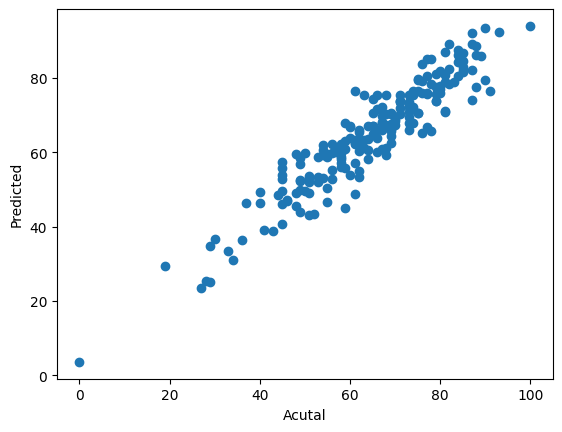

In [109]:
plt.scatter(y_test  ,y_pred)
plt.xlabel('Acutal')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

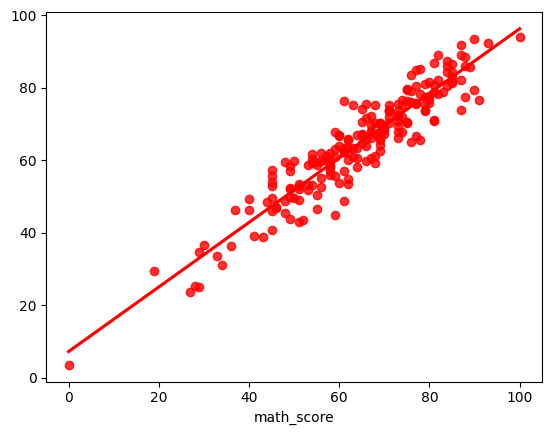

In [110]:
sns.regplot(x = y_test , y = y_pred , ci = None , color='red')

## Difference between Actual and Predicted Values 

In [111]:
pred_df = pd.DataFrame({'Actual values' : y_test , 'Predicted Values':y_pred , 'Differene' : y_test - y_pred})
pred_df

,Actual values,Predicted Values,Differene
521,91,76.546875,14.453125
737,53,58.839844,-5.839844
740,80,76.945312,3.054688
660,74,76.570312,-2.570312
411,84,87.535156,-3.535156
...,...,...,...
408,52,43.468750,8.531250
332,62,62.042969,-0.042969
208,74,67.843750,6.156250
613,65,67.167969,-2.167969
